In [287]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-clients/Copy of default of credit card clients.xls
/kaggle/input/default-of-credit-card-clients-dataset/default of credit card clients.xls


In [288]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [289]:
df=pd.read_excel("/kaggle/input/credit-card-clients/Copy of default of credit card clients.xls")

In [290]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [291]:
type(df)

pandas.core.frame.DataFrame

In [292]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [293]:
df.iloc[1:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# EDA (Exploratory Data Analysis)

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
df.shape

(30000, 25)

In [296]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [297]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<Axes: >

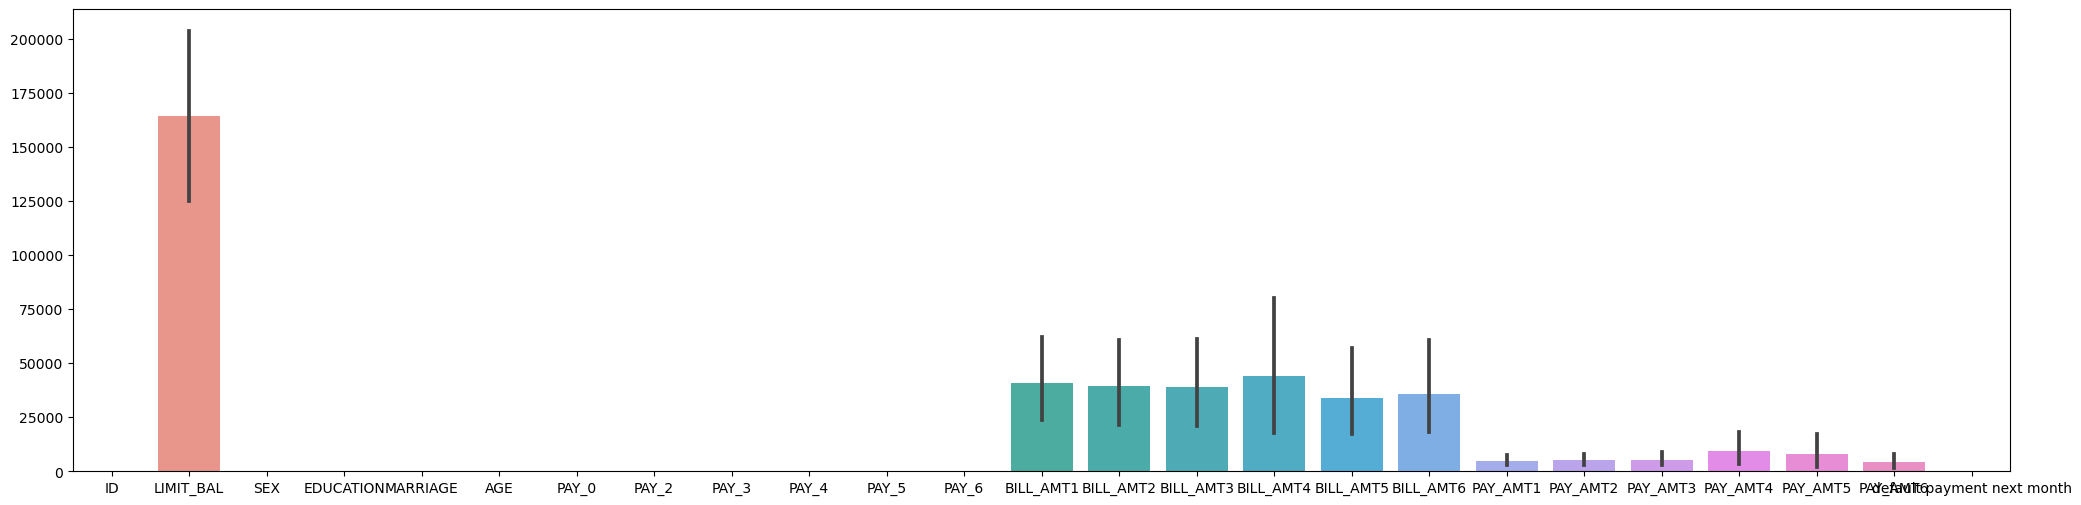

In [298]:
plt.figure(figsize=(25,6))
sns.barplot(df[:50])

In [299]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

<Axes: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

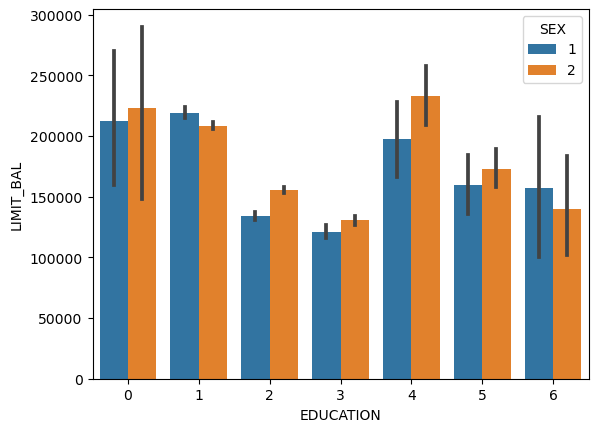

In [300]:
sns.barplot(x=df['EDUCATION'],y=df['LIMIT_BAL'],hue=df['SEX'])

<Axes: xlabel='EDUCATION', ylabel='count'>

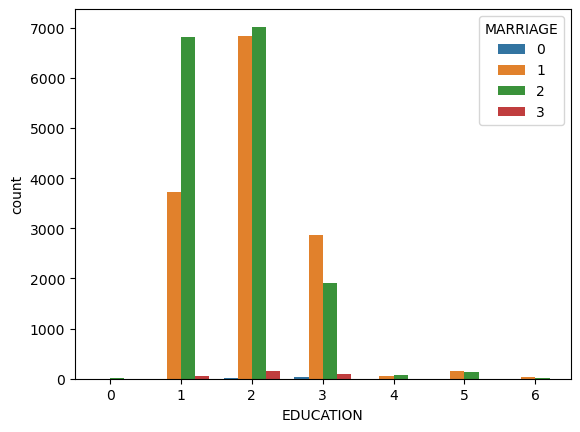

In [301]:
sns.countplot(x=df['EDUCATION'],hue=df['MARRIAGE'])

<Axes: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

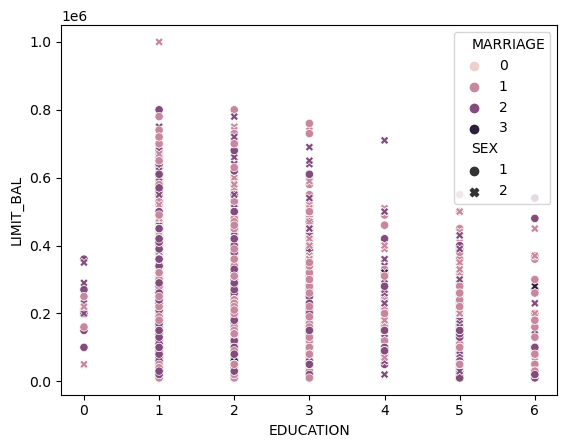

In [302]:
sns.scatterplot(x=df['EDUCATION'],y=df['LIMIT_BAL'],hue=df['MARRIAGE'],style=df['SEX'])

<Axes: >

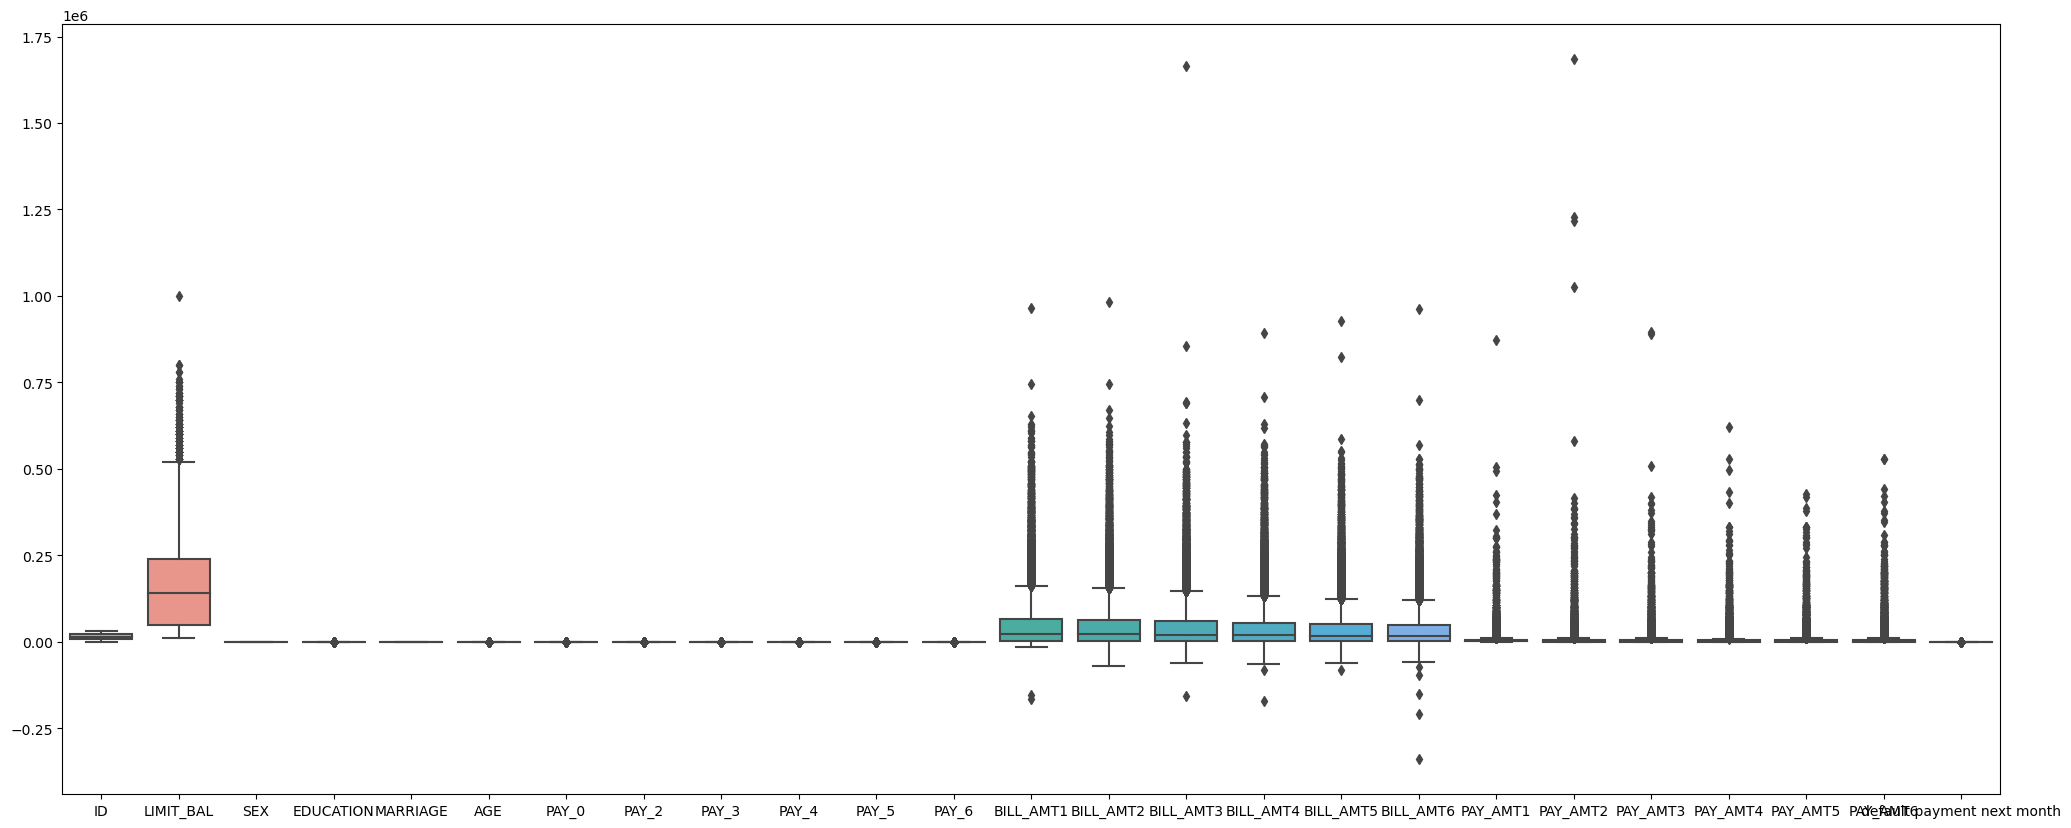

In [303]:
plt.figure(figsize=(25,10))
sns.boxplot(df)

In [304]:
df["default payment next month"].unique()

array([1, 0])

In [305]:
X=df.drop(columns="default payment next month")
y=df["default payment next month"]

In [306]:
##spliting the datasets into train and test 
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [308]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
adbc=AdaBoostClassifier()
Exc=ExtraTreesClassifier()
gdc=GradientBoostingClassifier()

**Implemention of Decision Tree Classifier**

In [309]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [310]:
y_pred_dtc=dtc.predict(X_test)

In [311]:
dtc_score=accuracy_score(y_test,y_pred_dtc)

**Random Forest Classifier**

In [312]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [313]:
y_pred_rfc=rfc.predict(X_test)

In [314]:
rfc_score=accuracy_score(y_test,y_pred_rfc)

**Implemention of AdaBoostinngClassifier**

In [315]:
adbc.fit(X_train,y_train)

AdaBoostClassifier()

In [316]:
y_pred_adab=adbc.predict(X_test)

In [317]:
adab_score=accuracy_score(y_test,y_pred_adab)

**Implementation of Gradient Descent**

In [318]:
gdc.fit(X_train,y_train)

GradientBoostingClassifier()

In [319]:
y_pred_gdc=gdc.predict(X_test)

In [320]:
gdc_score=accuracy_score(y_test,y_pred_gdc)

**Implementation of ExtraTreeClassifier**

In [321]:
Exc.fit(X_train,y_train)

ExtraTreesClassifier()

In [322]:
y_pred_exc=Exc.predict(X_test)

In [323]:
exc_score=accuracy_score(y_test,y_pred_exc)

In [324]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression

In [325]:
svc=SVC()

In [326]:
svc.fit(X_train,y_train)

SVC()

In [327]:
y_pred_svc=svc.predict(X_test)

In [328]:
svc_score=accuracy_score(y_test,y_pred_svc)

In [329]:
knn=KNeighborsClassifier(n_neighbors=10)
nbg=GaussianNB()
nbb=BernoulliNB()

**Implementation of K nearest neighbors**

In [330]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [331]:
y_pred_knn=knn.predict(X_test)

In [332]:
knn_score=accuracy_score(y_test,y_pred_knn)

**Implementation of GaussianNB**

In [333]:
nbg.fit(X_train,y_train)

GaussianNB()

In [334]:
nbg_score=nbg.predict(X_test)

In [335]:
nbg_score=accuracy_score(y_test,nbg_score)

**Implementation of BernoulliNB**

In [336]:
nbb.fit(X_train,y_train)

BernoulliNB()

In [337]:
y_pred_nbb=nbb.predict(X_test)

In [338]:
nbb_score=accuracy_score(y_test,y_pred_nbb)

In [339]:
d={
    'Model Name':['Decision Tree classifier','Random Forest Classifier','AdaBoosting Classing','Gradient Descent Classifier','ExtraTree Classifier','Support Vector Classifier','GaussianNB','BernoulliNB'],
    'Score':[dtc_score,rfc_score,adab_score,gdc_score,exc_score,svc_score,nbg_score,nbb_score]
}

In [340]:
pd.DataFrame(d)

,Model Name,Score
0,Decision Tree classifier,0.729444
1,Random Forest Classifier,0.814778
2,AdaBoosting Classing,0.817111
3,Gradient Descent Classifier,0.820889
4,ExtraTree Classifier,0.809889
5,Support Vector Classifier,0.782222
6,GaussianNB,0.377889
7,BernoulliNB,0.768000


In [341]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the neural network architecture
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(18,)),  # Input layer to hidden layer
    layers.Dense(64, activation='relu'),  # Hidden layer to hidden layer
    layers.Dense(2, activation='softmax')  # Hidden layer to output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Prepare your data (example data)
# features = tf.random.normal((100, 18))
# labels = tf.random.uniform((100,), minval=0, maxval=2, dtype=tf.int32)


In [342]:
import numpy as np
features=X_train.to_numpy()
labels=y_train.to_numpy()

In [347]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])


In [349]:
# Fit the recompiled model
model_3.fit(tf.expand_dims(features, axis=-1), 
            labels, 
            epochs=20)

Epoch 1/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3447 - accuracy: 0.3880
Epoch 2/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3463 - accuracy: 0.3879
Epoch 3/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3467 - accuracy: 0.3878
Epoch 4/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3461 - accuracy: 0.3879
Epoch 5/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3471 - accuracy: 0.3878
Epoch 6/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3467 - accuracy: 0.3878
Epoch 7/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3444 - accuracy: 0.3880
Epoch 8/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3497 - accuracy: 0.3876
Epoch 9/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3482 - accuracy: 0.3877
Epoch 10/20
657/657 [==============================] - 2s 3ms/step - loss: 9.3471 - accuracy: 0.3878